$$
\newcommand{\mat}[1]{\boldsymbol {#1}}
\newcommand{\mattr}[1]{\boldsymbol {#1}^\top}
\newcommand{\matinv}[1]{\boldsymbol {#1}^{-1}}
\newcommand{\vec}[1]{\boldsymbol {#1}}
\newcommand{\vectr}[1]{\boldsymbol {#1}^\top}
\newcommand{\rvar}[1]{\mathrm {#1}}
\newcommand{\rvec}[1]{\boldsymbol{\mathrm{#1}}}
\newcommand{\diag}{\mathop{\mathrm {diag}}}
\newcommand{\set}[1]{\mathbb {#1}}
\newcommand{\norm}[1]{\left\lVert#1\right\rVert}
\newcommand{\pderiv}[2]{\frac{\partial #1}{\partial #2}}
\newcommand{\bb}[1]{\boldsymbol{#1}}
$$
# Part 6: YOLO - Objects Detection
<a id=part6></a>

In this part we will use an object detection architecture called YOLO (You only look once) to detect objects in images. We'll use an already trained model weights (v3) found here: https://github.com/ultralytics/yolov3

In [1]:
import torch
import torchviz
from cs236781.answers import display_answer
import hw2.answers

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load the YOLO model
model = torch.hub.load('ultralytics/yolov3', 'yolov3')
model.to(device)
# Images
img1_path = 'imgs/DolphinsInTheSky.jpg'  
img2_path = 'imgs/cat-shiba-inu-2.jpg' 

Using cache found in /home/tom.rahav/.cache/torch/hub/ultralytics_yolov3_master
YOLOv3 🚀 2022-11-30 torch 1.10.1 CUDA:0 (NVIDIA TITAN Xp, 12196MiB)

Fusing layers... 
Model Summary: 261 layers, 61922845 parameters, 0 gradients, 155.9 GFLOPs
Adding AutoShape... 


## Inference with YOLO
<a id=part6_1></a>

You are provided with 2 images (img1 and img2).
**TODO**:
1. Detect objects using the YOLOv3 model for these 2 images.
2. Print the inference output with bounding boxes.
3. Calculate the number of pixels within a bounding box and the number in the background.
4. Look at the inference results and answer the question below.


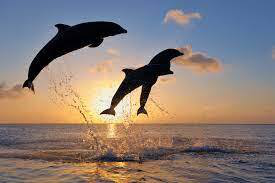

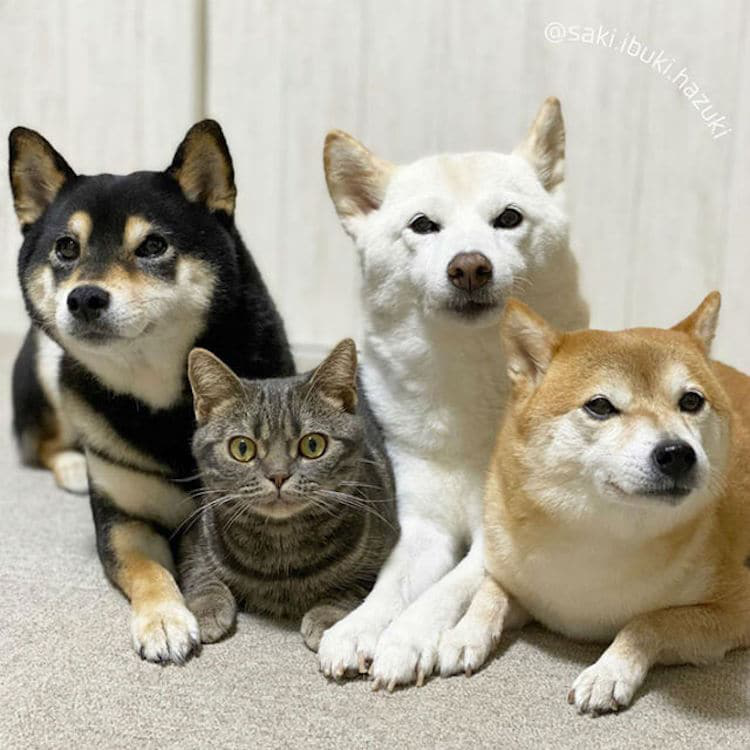

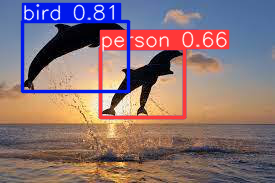

         xmin       ymin        xmax        ymax  confidence  class    name
0   22.397461  21.541504  128.046875   91.822266    0.810547     14    bird
1  100.063477  48.665527  184.980469  117.388680    0.656738      0  person
2  100.117188  48.746094  184.765625  117.281258    0.585938     14    bird


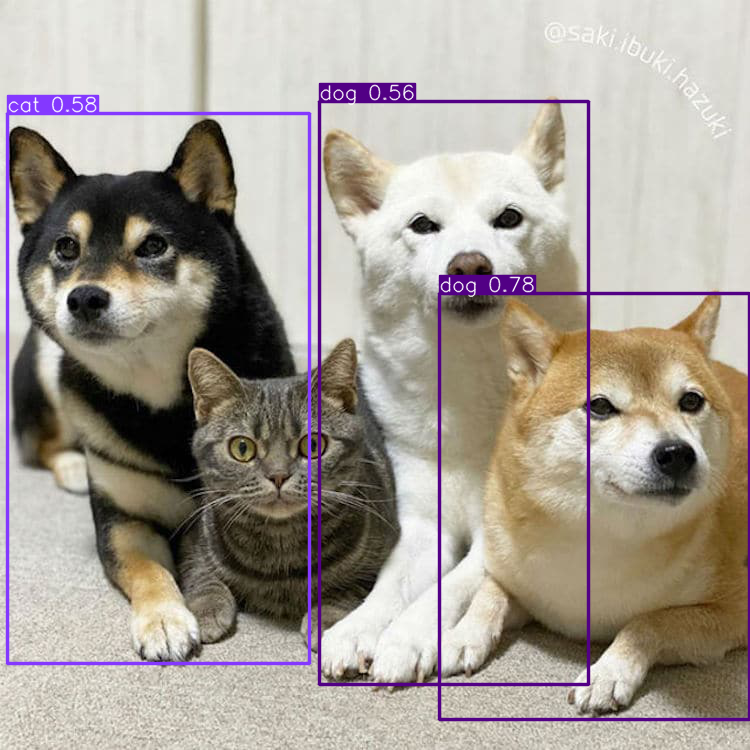


==================== Image 1 ====================

The number of pixels bound by boxes is approximately 12053
The number of pixels in the background is approximately 38271

==================== Image 2 ====================

The number of pixels bound by boxes is approximately 397096
The number of pixels in the background is approximately 165403


In [2]:
from PIL import Image
from matplotlib import pyplot as plt
img1 = Image.open(img1_path)
img2 = Image.open(img2_path)
img1_tensor = torch.tensor(plt.imread(img1_path))
img1.show()
img2.show()

y1 = model(img1_path)
y2 = model(img2_path)

y1.show()
print(y1.pandas().xyxy[0])
y2.show()


# print(img1)
# print(img2)


# print(y2.pandas().xyxy[0])

y1_boxes = sum((y1.pandas().xyxy[0]['xmax'] - y1.pandas().xyxy[0]['xmin'])*(y1.pandas().xyxy[0]['ymax'] - y1.pandas().xyxy[0]['ymin'])) - ((y1.pandas().xyxy[0]['xmax'] - y1.pandas().xyxy[0]['xmin'])*(y1.pandas().xyxy[0]['ymax'] - y1.pandas().xyxy[0]['ymin']))[2] - ((y1.pandas().xyxy[0]['xmax'][0] - y1.pandas().xyxy[0]['xmin'][1])*(y1.pandas().xyxy[0]['ymax'][0] - y1.pandas().xyxy[0]['ymin'][1]))
y1_outside_boxes = img1.size[0]*img1.size[1] - y1_boxes

y2_boxes = sum((y2.pandas().xyxy[0]['xmax'] - y2.pandas().xyxy[0]['xmin'])*(y2.pandas().xyxy[0]['ymax'] - y2.pandas().xyxy[0]['ymin'])) - ((y2.pandas().xyxy[0]['xmax'][2] - y2.pandas().xyxy[0]['xmin'][0])*(y2.pandas().xyxy[0]['ymax'][2] - y2.pandas().xyxy[0]['ymin'][0]))
y2_outside_boxes = img2.size[0]*img2.size[1] - y2_boxes


# print(y1.names)
# print("We have rounded up the numbers appering in the tables\n")
print("\n==================== Image 1 ====================\n")
print(f"The number of pixels bound by boxes is approximately {y1_boxes.astype(int)}")
print(f"The number of pixels in the background is approximately {y1_outside_boxes.astype(int)}\n")
print("==================== Image 2 ====================\n")
print(f"The number of pixels bound by boxes is approximately {y2_boxes.astype(int)}")
print(f"The number of pixels in the background is approximately {y2_outside_boxes.astype(int)}")


### Question 1

Analyze the inference results of the 2 images. 
1. How well did the model detect the objects in the pictures?
2. What can possibly be the reason for the model failures? suggest methods to resolve that issue.

In [3]:
display_answer(hw2.answers.part6_q1)


**Your answer:**

1. In the first image the model did a really bad job, he identified 3 dolphins as a bird and a person.
In the second image the model did a better job where he successfully identified 2 dogs perfectly but the remaining dog 
and cat where identified as a cat, which is not great...

2. The reason for the mistake in the first image with the dolphins is that the model has no class dolphin, so he 
assigns the class closest to it and because both are "flying" in the picture (mostly the left one) he thought it's a 
bird. The reason for the mistake in the second image is probably because of two thing, one is the fact the object are 
cluttered, this hurts the model ability to predict correctly and the ??second reason is that maybe the model has been 
trained on data that has mostly up to 3 animals so he is biased towards 3 animals??.



### Question 2

**TODO**: Print the computational graph of the model using torchviz.


In [4]:
# Written in the Piazza by Moshe Kimhi that this question does not need to be done


Look at the computational graph and describe the model.

In [5]:
display_answer(hw2.answers.part6_q2)


**Your answer:**


Written in the Piazza by Moshe Kimhi that this question doesn't need to be done



## Creative Detection Failures

<a id=part6_2></a>

Object detection pitfalls could be, for example: **occlusion** - when the objects are partially occlude, and thus missing important features, **model bias** - when a model learn some bias about an object, it could recognize it as something else in a different setup, and many others like **Deformation**, **Illumination conditions**, **Cluttered** or **textured background and blurring** due to moving objects.

**TODO**: Take pictures and that demonstrates 3 of the above object detection pitfalls, run inference and analyze the results.

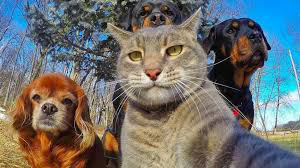

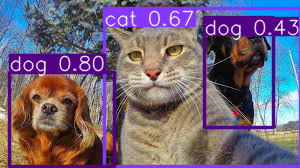

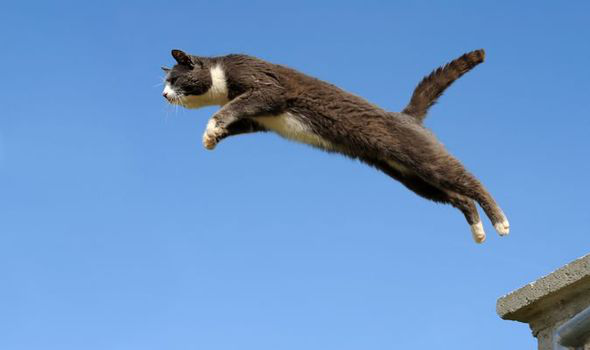

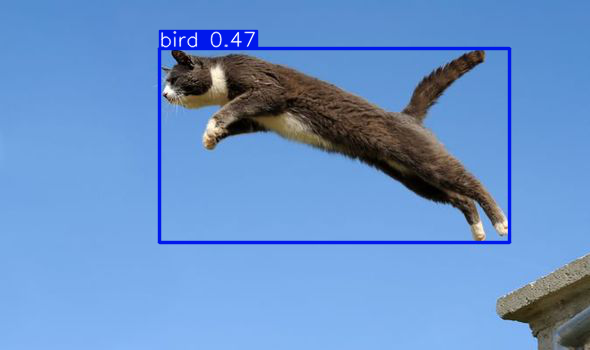

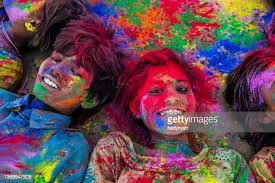

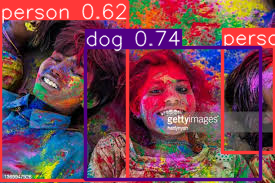

In [6]:
# img3 = 'imgs/cat_shepherd_lying_on_grass_smiling.jpg' 
# model(img3).show()
# img4 = 'imgs/ginger_cat_attacking_pitball.webp' 
# model(img4).show()
# img5 = 'imgs/person_holding_cat_in_front_of_dog_with_blur.png' 
# model(img5).show()
# img6 = 'imgs/dolphin_smiles.jpg' 
# model(img6).show()
# img7 = 'imgs/tiger_shark.webp' 
# model(img7).show()
img8 = 'imgs/gangstar_dogs_and_cat.jfif' 
Image.open(img8).show()
model(img8).show()
# img9 = 'imgs/dog_behind_baby_guardrail.jfif' 
# model(img9).show()
# img10 = 'imgs/bulldog_behind_bars.jfif' 
# model(img10).show()
# img11 = 'imgs/images.jpeg'
# Image.open(img11).show()
# model(img11).show()
# img12 = 'imgs/Times-Square-Celebration.jpg' 
# Image.open(img12).show()
# model(img12).show()
img13 = 'imgs/Cat-jump.jpg' 
Image.open(img13).show()
model(img13).show()
# img14 = 'imgs/cat_jump2.jpg' 
# model(img14).show()
# img14 = 'imgs/images1.jpeg'
# Image.open(img14).show()
# model(img14).show()
img15 = 'imgs/images2.jpeg'
Image.open(img15).show()
model(img15).show()
# img16 = 'imgs/images3.jpeg'
# Image.open(img16).show()
# model(img16).show()

### Question 3

Analyize the results of the inference. 
1. How well did the model detect the objects in the pictures? explain.


In [7]:
display_answer(hw2.answers.part6_q3)


**Your answer:**

After checking many different pictures we picked these 3 examples (shown above comparison between the original image and
the one with the identified objects blocks):

Image 1 - Here we can see that there is a dog behind the cat that the model does not even identify, this happens because
of occlusion, the dog behind is mostly hidden because the cat in the front thus not identified.

Image 2 - Here we can see that a jumping cat is identified as a bird, probably because of the fact it's in a big blue
background which implies it's a bird from what the model has learned. 
that's a classic case of model bias (which can be solved as seen in the bonus section).

Image 3 - Here we can see 2 kids (and 2 other kids that are mostly not seen so we will ignore them), one of them is 
identified correctly as a person while the other is being identified as a dog probably due to the huge amount of 
different colors which probably does not fir to the data the model trained on (solved in bonus section). 


## Bonus 
<a id=part6_3></a>

Try improving the model performance over poorly recognized images by changing them. 
Describe the manipulations you did to the pictures.

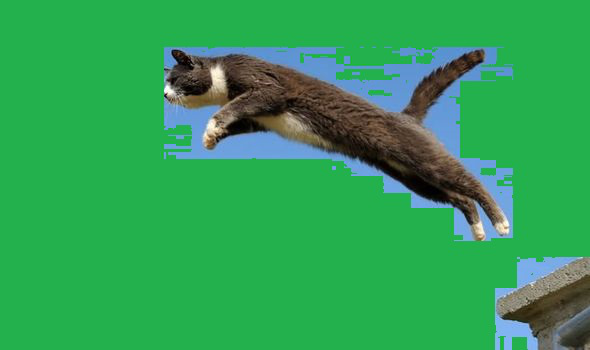

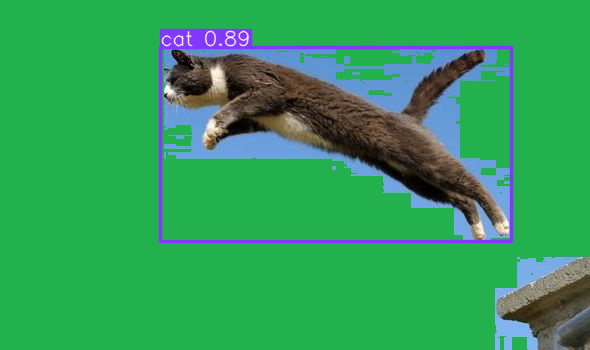

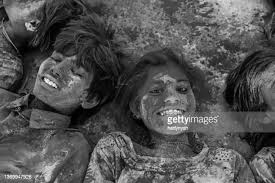

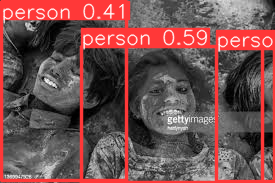

In [8]:
img17 = 'imgs/Cat-jump-mod.jpg' 
Image.open(img17).show()
model(img17).show()
img18 = 'imgs/images2.jpeg'
img18 = Image.open(img18).convert('L')
img18.show()
model(img18).show()

In [9]:
display_answer(hw2.answers.part6_bonus)


**Your answer:**

As we can see we changed pictures 2 and 3 and improved the model performance in a way that now it's correct in it's 
object classification.

In image 2 (the flying cat) we turned most of the blue background into green (which might suggest it's grass), this 
change caused the model to identify the cat with high confidence.

In image 3 (the painted kids) we greyscale the picture in hope that the loss of color will enable the model to come to 
the correct conclusion, which he did. now both kids have been identified correctly.

